# Retail Data Wrangling and Analytics

In [1]:
# Import modules 
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import psycopg2 as ps
import warnings
warnings.filterwarnings("ignore")

# Load Data from PSQL into DataFrame

**Setup Docker Containers**

![](https://i.imgur.com/VQrBVBk.jpg)

```
#make sure you have both Jupyter and PSQL docker container running
docker ps

#Attach a bridge network to both containers so they can communicate with each other
docker network create jarvis-net
#this command works on running containers
docker network connect jarvis-net jarvis-jupyter
docker network connect jarvis-net jarvis-psql

#verify both containers are attached to the jarvis-net
docker network inspect trading-net

#Note: instead of using `localhost`, you should use container names as hostnames.
```

**Data Preperation**

- Use [pandas.read_sql](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_sql.html) api to load the PSQL retail table into a Pandas DataFrame

![](https://i.imgur.com/AmkAP63.jpg)

- Get familair with the transaction date with `df.head()`, `df.sample(10)`, `df.info()`, `df.describe()`, etc..



In [2]:
# #install psql "driver"
# !pip3 install psycopg2-binary

In [3]:
# Connect to Postgres
conn2 = ps.connect(dbname="postgres",
                  user = "postgres",
                  password = "tarek102030",
                  host = "jrvs-psql",
                  port = "5432")

In [4]:
# Convert retail table to a Dataframe
df = pd.read_sql_query(""" select * 
                    from public.retail""",conn2)

In [5]:
# Display the first 5 rows of the retail table
df.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [6]:
# Display the last 5 rows of the retail table
df.tail()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France
1067370,581587,POST,POSTAGE,1,2011-12-09 12:50:00,18.00,12680.0,France


In [7]:
# randomly retrive 10 entities
df.sample(10)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
764038,C557943,23146,TRIPLE HOOK ANTIQUE IVORY ROSE,-3,2011-06-23 16:09:00,3.29,14217.0,United Kingdom
921372,571046,22629,SPACEBOY LUNCH BOX,2,2011-10-13 13:35:00,1.95,18096.0,United Kingdom
373941,525458,22227,HANGING HEART MIRROR DECORATION,2,2010-10-05 14:45:00,1.28,NaN,United Kingdom
185041,507006,84832,ZINC WILLIE WINKIE CANDLE STICK,6,2010-05-05 14:22:00,0.85,15097.0,United Kingdom
580679,540979,22953,BIRTHDAY PARTY CORDON BARRIER TAPE,6,2011-01-12 15:06:00,1.25,15727.0,United Kingdom
524203,538071,85014B,RED RETROSPOT UMBRELLA,1,2010-12-09 14:09:00,12.72,NaN,United Kingdom
642905,546388,21731,RED TOADSTOOL LED NIGHT LIGHT,13,2011-03-11 13:42:00,4.13,NaN,United Kingdom
599714,542412,22021,BLUE FELT EASTER EGG BASKET,1,2011-01-27 16:49:00,1.65,16725.0,United Kingdom
346705,523130,22115,METAL SIGN EMPIRE TEA,2,2010-09-20 13:47:00,2.95,17259.0,United Kingdom
83375,497145,84896C,None,-12,2010-02-05 15:47:00,0.00,NaN,United Kingdom


In [8]:
# Retail table information: Column names, Number of non-null values in each column, and the data type.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column        Non-Null Count    Dtype         
---  ------        --------------    -----         
 0   invoice_no    1067371 non-null  object        
 1   stock_code    1067371 non-null  object        
 2   description   1062989 non-null  object        
 3   quantity      1067371 non-null  int64         
 4   invoice_date  1067371 non-null  datetime64[ns]
 5   unit_price    1067371 non-null  float64       
 6   customer_id   824364 non-null   float64       
 7   country       1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


In [9]:
# Descriptive statistics of the retail dataframe
df.describe()

,quantity,unit_price,customer_id
count,1.067371e+06,1.067371e+06,824364.000000
mean,9.938898e+00,4.649388e+00,15324.638504
std,1.727058e+02,1.235531e+02,1697.464450
min,-8.099500e+04,-5.359440e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13975.000000
50%,3.000000e+00,2.100000e+00,15255.000000
75%,1.000000e+01,4.150000e+00,16797.000000
max,8.099500e+04,3.897000e+04,18287.000000


# Load CSV into Dataframe
Alternatively, the LGS IT team also dumped the transactional data into a [CSV file](https://raw.githubusercontent.com/jarviscanada/jarvis_data_eng_demo/feature/data/python_data_wrangling/data/online_retail_II.csv). However, the CSV header (column names) doesn't follow the snakecase or camelcase naming convention (e.g. `Customer ID` instead of `customer_id` or `CustomerID`). As a result, you will need to use Pandas to clean up the data before doing any analytics. In addition, unlike the PSQL scheme, CSV files do not have data types associated. Therefore, you will need to cast/convert certain columns into correct data types (e.g. DateTime, numbers, etc..)

**Data Preperation**

- Read the `data/online_retail_II.csv` file into a DataFrame
- Rename all columns to upper camelcase or snakecase
- Convert/cast all columns to the appropriate data types (e.g. datetime)

In [10]:
retail_df = pd.read_csv('./data/online_retail_II.csv')
retail_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [11]:
# Rename all columns
retail_df.rename(columns = {'Invoice':'invoice_no', 
                            'StockCode':'stock_code',
                            'Description':'description', 
                            'Quantity':'quantity',
                            'InvoiceDate':'invoice_date', 
                            'Price':'unit_price',
                            'Customer ID':'customer_id', 
                            'Country':'country'}, inplace = True)

In [12]:
# Convert invoice_date column to datetime data type
retail_df.head()
retail_df['invoice_date']= pd.to_datetime(retail_df['invoice_date'])
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column        Non-Null Count    Dtype         
---  ------        --------------    -----         
 0   invoice_no    1067371 non-null  object        
 1   stock_code    1067371 non-null  object        
 2   description   1062989 non-null  object        
 3   quantity      1067371 non-null  int64         
 4   invoice_date  1067371 non-null  datetime64[ns]
 5   unit_price    1067371 non-null  float64       
 6   customer_id   824364 non-null   float64       
 7   country       1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


# Total Invoice Amount Distribution

---
**Please remove this insturction cell after you are done with coding**

1. Calculate the invoice amount. Note: an invoice consists of one or more items where each item is a row in the df. (hint: you need to `GROUP BY invoice`)
2. Draw the distribution of invoice amount with min, max, median, mod, and mean. However, you will notice many outlier data (e.g. invoices with large amounts). Sample hist and box charts:

![](https://i.imgur.com/N8hsbDa.jpg)

3. Draw the distribution for the first 85 quantiles of the invoice amount data with min, max, median, mod, and mean.


![](https://i.imgur.com/tJrH1qj.jpg)


---

## 1. Calculate the invoice amount.

In [13]:
# Create a invoice amount column of each order (quantity * unit_price)
df['invoice_amount'] = df['quantity'] * df['unit_price'] 
df

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,invoice_amount
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85


In [14]:
# Using groupby to find the total amount of each invoice.
df.groupby('invoice_no').sum()

# Note: Negative values means that the order has been cancelled, we could eliminate them but the requriments is to
# find the total invoice amount (postive and negative values)

,quantity,unit_price,customer_id,invoice_amount
invoice_no,,,,
489434,166,32.65,104680.0,505.30
489435,60,10.50,52340.0,145.80
489436,193,70.88,248482.0,630.33
489437,145,83.45,353326.0,310.75
489438,826,44.05,307734.0,2286.24
...,...,...,...,...
C581484,-80995,2.08,16446.0,-168469.60
C581490,-23,2.78,28794.0,-32.53
C581499,-1,224.69,15498.0,-224.69


In [15]:
# Showing only the invoice amount and invoice number.
df.groupby('invoice_no').sum()['invoice_amount']

invoice_no
489434        505.30
489435        145.80
489436        630.33
489437        310.75
489438       2286.24
             ...    
C581484   -168469.60
C581490       -32.53
C581499      -224.69
C581568       -54.75
C581569        -7.50
Name: invoice_amount, Length: 53628, dtype: float64

## Draw the distribution of invoice amount with min, max, median, mode, and mean. 

In [16]:
# # # Convert from scientific notation to numeric value 
# pd.set_option('display.float_format', '{:.2f}'.format)

In [17]:
# Discribe invoice amount
df['invoice_amount'].describe()

count    1.067371e+06
mean     1.806987e+01
std      2.924202e+02
min     -1.684696e+05
25%      3.750000e+00
50%      9.900000e+00
75%      1.770000e+01
max      1.684696e+05
Name: invoice_amount, dtype: float64

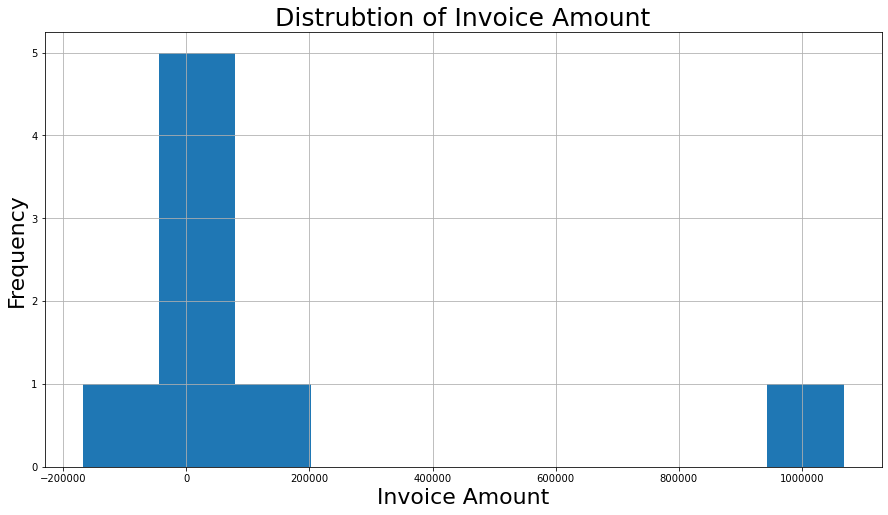

In [18]:
# Plotting distribution of invoice amount using histogram
fig, ax =  plt.subplots(figsize=(15, 8)) # size of the figure
df['invoice_amount'].describe().plot.hist()
plt.title('Distrubtion of Invoice Amount',fontsize=25)

ax.ticklabel_format(style='plain') # convert x-axis from scientific notation to numeric value 
plt.xlabel('Invoice Amount', fontsize=22)
plt.ylabel('Frequency', fontsize=22)
plt.grid()
plt.show();


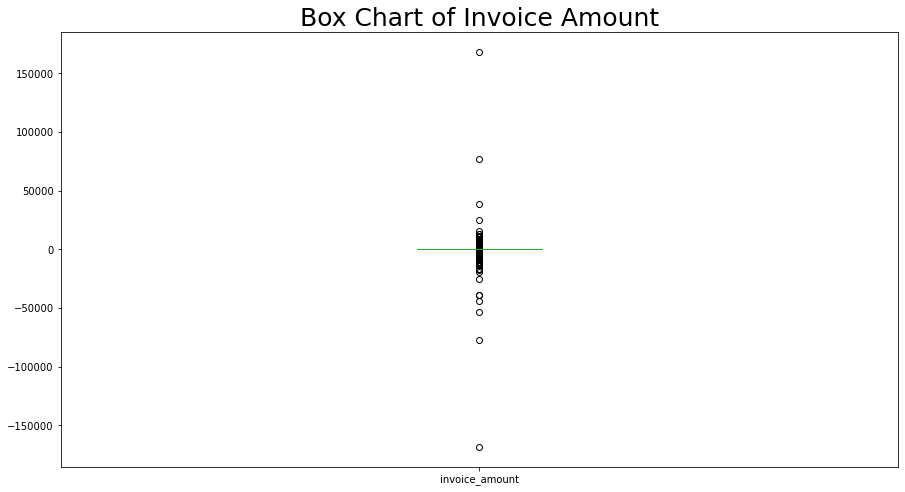

In [19]:
fig, ax =  plt.subplots(figsize=(15, 8))
df['invoice_amount'].plot.box()
plt.title('Box Chart of Invoice Amount',fontsize=25)
plt.show();

# Box chart is not giving us a useful information because there so many outliers

## 3. Draw the distribution for the first 85 quantiles of the invoice amount data with min, max, median, mod, and mean.

In [20]:
# Using slicing to get the first 85 rows
df_first85 = df[:85]
df_first85

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,invoice_amount
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0
...,...,...,...,...,...,...,...,...,...
80,489439,22333,RETRO SPORT PARTY BAG + STICKER SET,8,2009-12-01 09:28:00,1.65,12682.0,France,13.2
81,489439,85216,ASSORTED CAKES FRIDGE MAGNETS,12,2009-12-01 09:28:00,0.65,12682.0,France,7.8
82,489439,21493,VINTAGE DESIGN GIFT TAGS,12,2009-12-01 09:28:00,0.85,12682.0,France,10.2
83,489439,22130,PARTY CONE CHRISTMAS DECORATION,24,2009-12-01 09:28:00,0.85,12682.0,France,20.4


In [21]:
df_first85['invoice_amount'].describe()

count     85.000000
mean      48.886118
std       65.870615
min        7.800000
25%       14.850000
50%       19.800000
75%       59.500000
max      384.000000
Name: invoice_amount, dtype: float64

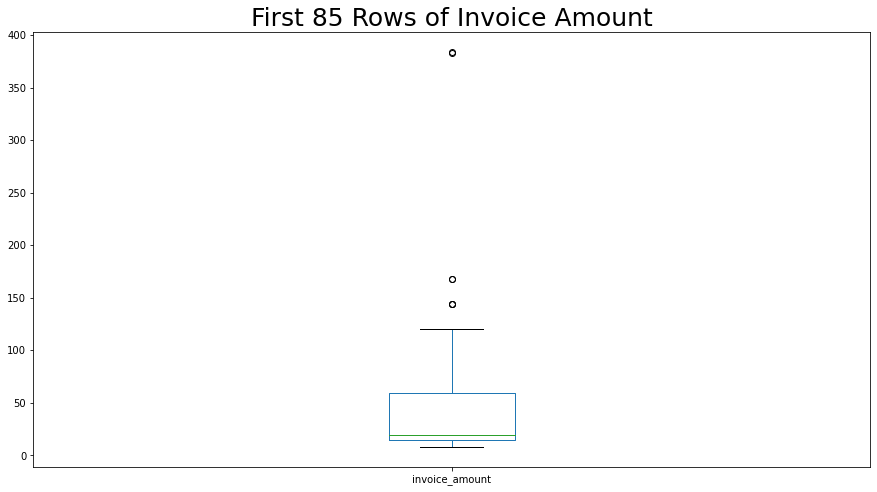

In [22]:
# Plotting box chart of the first 85 rows of the dataframe
fig, ax =  plt.subplots(figsize=(15, 8))
df_first85['invoice_amount'].plot.box()
plt.title('First 85 Rows of Invoice Amount',fontsize=25)
plt.show();

# Monthly Placed and Canceled Orders

---
**Please remove this insturction cell after you are done with coding**

- The attribute information (see the `project kick-off` section) contains useful information that helps you to identify canceled orders
- To simplify the problem, you can assume that there are two invoice numbers for each canceled order (one for the original invoice and one for the canceled invoice). Therefore, `# of placed orders = total # of orders - 2 * canceled order`. Furthermore, you can also assume the original invoice and canceled invoice are on always on the same day (this eliminate the case where the original invoice and canceled invoices are on different months)
- hints: you might want to create a new integer column with YYYYMM format. e.g. `2009-12-01 07:45:00 -> 200912` which allows easy GROUP BY.

**Sample Plot:**

![](https://i.imgur.com/tmLsPDf.jpg)

---

In [23]:
# Retrive canceled orders
df_cancel=df[df['invoice_no'].str.startswith('C')]
df_cancel

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,invoice_amount
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,-35.40
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia,-9.90
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia,-17.00
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia,-12.60
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,-35.40
...,...,...,...,...,...,...,...,...,...
1065910,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,-9.13
1067002,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,-224.69
1067179,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,-54.75
1067180,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,-1.25


In [24]:
# Create a YYYYMM colum 
df_cancel['YYYYMM'] = df_cancel['invoice_date'].dt.strftime('%Y%m')
df_cancel

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,invoice_amount,YYYYMM
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,-35.40,200912
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia,-9.90,200912
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia,-17.00,200912
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia,-12.60,200912
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,-35.40,200912
...,...,...,...,...,...,...,...,...,...,...
1065910,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,-9.13,201112
1067002,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,-224.69,201112
1067179,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,-54.75,201112
1067180,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,-1.25,201112


In [25]:
# Number of canceled orders each month
df_cancel.groupby('YYYYMM').size()

YYYYMM
200912    1015
201001     686
201002     576
201003     844
201004     626
201005     983
201006     793
201007     734
201008     573
201009     812
201010    1041
201011    1194
201012    1057
201101     701
201102     475
201103     699
201104     559
201105     621
201106     711
201107     685
201108     668
201109     805
201110    1200
201111    1076
201112     360
dtype: int64

In [26]:
# Double check my results
len(df_cancel[df_cancel['YYYYMM'] == '201112'])
# We can see that there were 360 canceled orders in December 2011 which means the code is running correctly.

360

# Monthly Sales

---
**Please remove this insturction cell after you are done with coding**


- Calculate the monthly sales data
- Plot a chart to show monthly sales (e.g. x-asix=year_month, y-axis=sales_amount)

![](https://i.imgur.com/k1KOqKO.jpg)

---

In [27]:
df['YYYYMM'] = df['invoice_date'].dt.strftime('%Y%m')
df.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,invoice_amount,YYYYMM
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,200912
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,200912
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,200912
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,200912
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,200912


In [28]:
df_sales = df[~df['invoice_no'].str.startswith('C')]
df_sales_total=df_sales.groupby('YYYYMM').sum()
df_sales_total['invoice_amount']

YYYYMM
200912     825685.760
201001     652708.502
201002     553339.736
201003     833570.131
201004     627934.592
201005     659858.860
201006     752270.150
201007     606681.140
201008     697274.910
201009     924333.011
201010    1126558.010
201011    1470272.482
201012    1262598.730
201101     691364.560
201102     523631.890
201103     717639.360
201104     537808.621
201105     770536.020
201106     761739.900
201107     719221.191
201108     737014.220
201109    1058590.172
201110    1154979.300
201111    1509496.330
201112     638810.680
Name: invoice_amount, dtype: float64

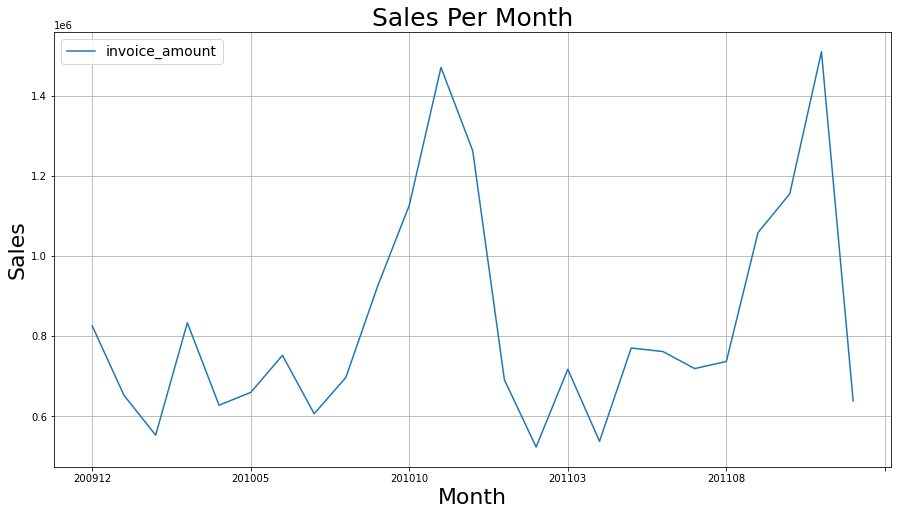

In [29]:
# Plotting the sales per month
df_sales_total.plot(y='invoice_amount', use_index=True,figsize=(15, 8))
plt.title('Sales Per Month',fontsize=25)

plt.xlabel('Month', fontsize=22)
plt.ylabel('Sales', fontsize=22)
plt.legend(fontsize=14)
plt.grid()
plt.show();

# We can see that the sales were high in Nov 2010 and Nov 2011

# Monthly Sales Growth


---
**Please remove this insturction cell after you are done with coding**

- Calculate monthly sales percentage growth data
- Plot a chart to show the growth percentage

![](https://i.imgur.com/J3btp8j.jpg)

---

In [30]:
# Calculating the monthly sales percentage growth
df_sales_total['sales_growth']=df_sales_total['invoice_amount'].pct_change().mul(100).round(2)
df_sales_total[['invoice_amount','sales_growth']]

,invoice_amount,sales_growth
YYYYMM,,
200912,825685.760,NaN
201001,652708.502,-20.95
201002,553339.736,-15.22
201003,833570.131,50.64
201004,627934.592,-24.67
201005,659858.860,5.08
201006,752270.150,14.00
201007,606681.140,-19.35
201008,697274.910,14.93


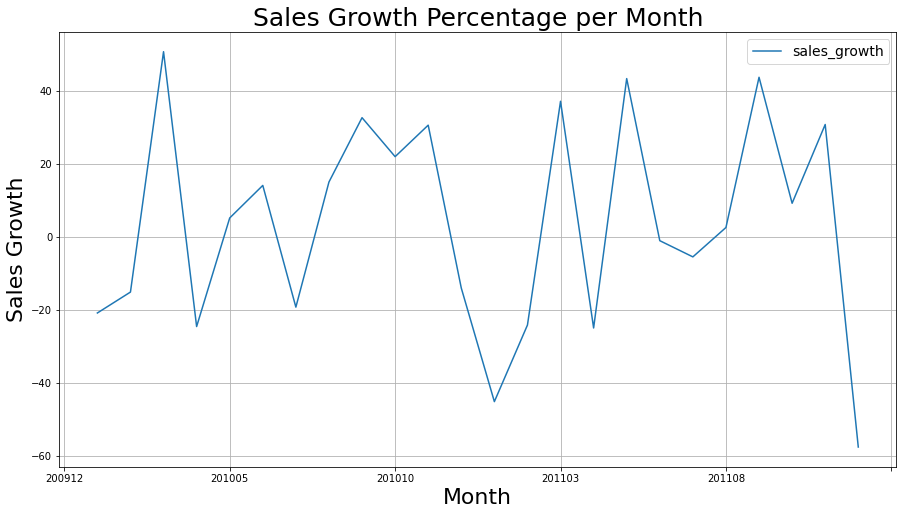

In [31]:
# Plotting the sales growth per month
df_sales_total.plot(y='sales_growth', use_index=True,figsize=(15, 8))
plt.title('Sales Growth Percentage per Month',fontsize=25)
plt.xlabel('Month', fontsize=22)
plt.ylabel('Sales Growth', fontsize=22)
plt.grid()
plt.legend(fontsize=14)
plt.show();

# Monthly Active Users

---
**Please remove this insturction cell after you are done with coding**

- Compute # of active users (e.g. unique `CusotomerID`) for each month
- Plot a bar chart

![](https://i.imgur.com/eFYp8VF.jpg)

---

In [32]:
df.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,invoice_amount,YYYYMM
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,200912
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,200912
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,200912
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,200912
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,200912


In [33]:
df_active_users=df.groupby('customer_id').size()
df_active_users

customer_id
12346.0     48
12347.0    253
12348.0     51
12349.0    180
12350.0     17
          ... 
18283.0    986
18284.0     29
18285.0     12
18286.0     70
18287.0    156
Length: 5942, dtype: int64

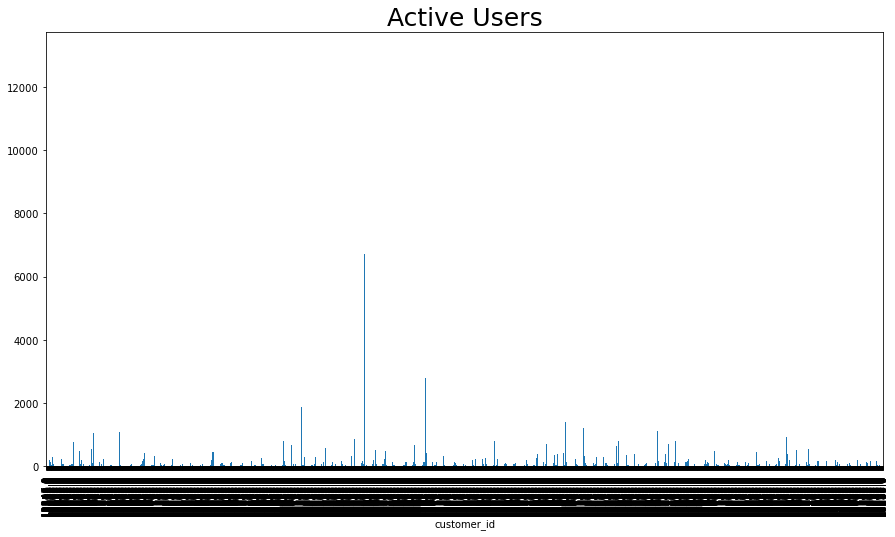

In [34]:
# Plotting the sales growth per month
df_active_users.plot.bar(figsize=(15, 8))
plt.title('Active Users',fontsize=25)
plt.xticks(rotation=90)

plt.show();

# New and Existing Users



---
**Please remove this insturction cell after you are done with coding**

- Plot a diagram to show new and exiting user for each month.
- A user is identified as a new user when he/she makes the first purchase
- A user is identified as an existing user when he/she made purchases in the past
- hints:
  - find out the first purchase year-month for each user and then join this data with the transactional data to help you identified new/exiting users

![](https://i.imgur.com/nWjnrpr.jpg)

---

In [35]:
df= df.assign(occurence=np.where(df['customer_id'].duplicated(),'Existing','New'))
df.head(15)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,invoice_amount,YYYYMM,occurence
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40,200912,New
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,200912,Existing
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,200912,Existing
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80,200912,Existing
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00,200912,Existing
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom,39.60,200912,Existing
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00,200912,Existing
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom,59.50,200912,Existing
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom,30.60,200912,Existing
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom,45.00,200912,Existing


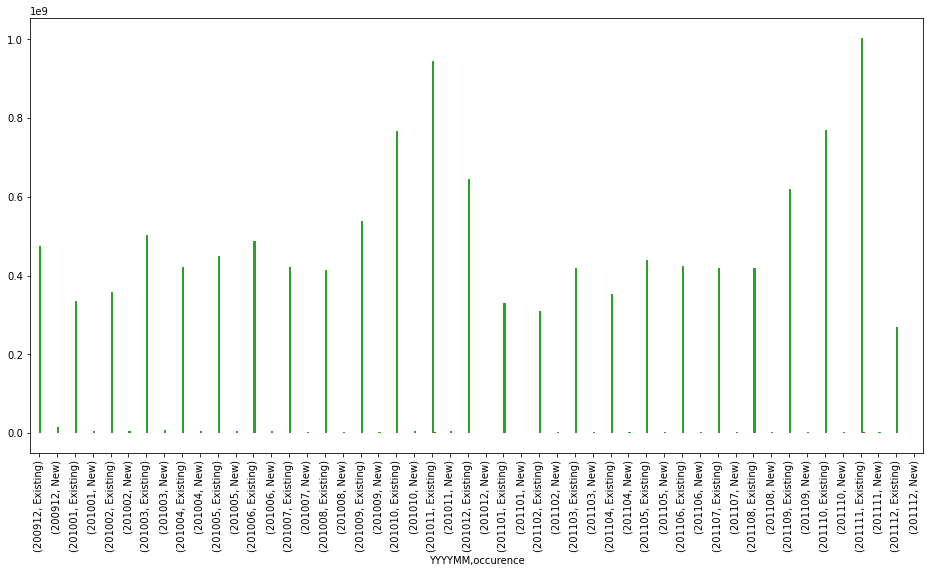

In [36]:
# Plotting New & Existing users each month
import seaborn as sns

df.groupby(by = ["YYYYMM","occurence"]).sum().plot(legend=False,kind = 'bar',figsize=(16,8));

## Finding RFM

RFM is a method used for analyzing customer value. It is commonly used in database marketing and direct marketing and has received particular attention in the retail and professional services industries. ([wikipedia](https://en.wikipedia.org/wiki/RFM_(market_research)))

Optional Reading: [Making Your Database Pay Off Using Recency Frequency and Monetary Analysis](http://www.dbmarketing.com/2010/03/making-your-database-pay-off-using-recency-frequency-and-monetary-analysis/)


RFM stands for three dimensions:

- Recency – How recently did the customer purchase?

- Frequency – How often do they purchase?

- Monetary Value – How much do they spend?

Note: To simplify the problem, let's keep all placed and canceled orders.


**Sample RFM table**

![](https://i.imgur.com/sXFIg6u.jpg)

In [37]:
# First we need to check if we have null customer IDs
df.customer_id.isna().sum() # We have 243007 nan values, let's clean our dataframe
df= df[pd.notnull(df['customer_id'])]
df.customer_id.isna().sum() # Good to go

0

In [38]:
df_sub=df[['customer_id','invoice_date','invoice_no','invoice_amount']]
df_sub

,customer_id,invoice_date,invoice_no,invoice_amount
0,13085.0,2009-12-01 07:45:00,489434,83.40
1,13085.0,2009-12-01 07:45:00,489434,81.00
2,13085.0,2009-12-01 07:45:00,489434,81.00
3,13085.0,2009-12-01 07:45:00,489434,100.80
4,13085.0,2009-12-01 07:45:00,489434,30.00
...,...,...,...,...
1067366,12680.0,2011-12-09 12:50:00,581587,12.60
1067367,12680.0,2011-12-09 12:50:00,581587,16.60
1067368,12680.0,2011-12-09 12:50:00,581587,16.60
1067369,12680.0,2011-12-09 12:50:00,581587,14.85


In [39]:
# Calculate recency
df_rc = df_sub.groupby('customer_id',as_index=False)['invoice_date'].max() 
df_rc

recent_date = df_rc['invoice_date'].max()
# Calculate recency
df_rc['Recency'] = df_rc['invoice_date'].apply(lambda x: (recent_date - x).days)
df_rc.head()

,customer_id,invoice_date,Recency
0,12346.0,2011-01-18 10:17:00,325
1,12347.0,2011-12-07 15:52:00,1
2,12348.0,2011-09-25 13:13:00,74
3,12349.0,2011-11-21 09:51:00,18
4,12350.0,2011-02-02 16:01:00,309


In [40]:
# Calculate frequency
df_freq = df_sub.groupby(by=['customer_id'], as_index=False)['invoice_date'].count()

# Rename column
df_freq.rename(columns = {'invoice_date':'Frequency'}, inplace = True)
df_freq.head()

,customer_id,Frequency
0,12346.0,48
1,12347.0,253
2,12348.0,51
3,12349.0,180
4,12350.0,17


In [41]:
# Calculate Monetary Value
df_mon = df.groupby(by='customer_id', as_index=False)['invoice_amount'].sum()

# Rename column
df_mon.rename(columns = {'invoice_amount':'Monetary_Value'}, inplace = True)
df_mon.head()


,customer_id,Monetary_Value
0,12346.0,-64.68
1,12347.0,5633.32
2,12348.0,2019.40
3,12349.0,4404.54
4,12350.0,334.40


In [42]:
# Merge them together into one dataframe
df_rfm = pd.merge(pd.merge(df_rc,df_freq,on='customer_id'),df_mon,on='customer_id').drop(columns='invoice_date')
df_rfm.head()

,customer_id,Recency,Frequency,Monetary_Value
0,12346.0,325,48,-64.68
1,12347.0,1,253,5633.32
2,12348.0,74,51,2019.40
3,12349.0,18,180,4404.54
4,12350.0,309,17,334.40


# RFM Segmentation

---
**Please remove this insturction cell after you are done with coding**
RFM segmentation categorizes your customers into different segments, according to their interactions with your website, which will allow you to subsequently approach these groups in the most effective way. In this article, we will show you how to make an RFM segmentation based on an RFM score combining all three RFM parameters together and allowing you to divide your customers into 11 different segments. 

- [RFM Segmentation business cases](https://docs.exponea.com/docs/rfm-segmentation-business-use)

- [RFM Segmentation Guide](https://docs.exponea.com/docs/rfm-segmentation-business-use)

As you can see, computing RFM segmentation requires extensive domain knowledge in marketing which is out of the scope in this project. In practice, you will work with BA/DA to figure out how to compute RFM segments. To simplify this project, a [sample RFM segmentation Notebook](https://github.com/jarviscanada/jarvis_data_eng_demo/blob/feature/data/python_data_wrangling/ipynb/customer-segmentation-with-rfm-score.ipynb) is provided. You are responsible to understand everything from that Notebook and then integrate it into yours. 

- Download the [sample notebook](https://github.com/jarviscanada/jarvis_data_eng_demo/blob/feature/data/python_data_wrangling/ipynb/customer-segmentation-with-rfm-score.ipynb) and import to your Jupyter Notebook or VSCode
- Run the notebook and understand all cells
- Read the remark section at the end of the notebook. You will need this information when writing the README file
- Integrate the RFM segmentation calculation into your notebook

---

In [46]:
#RFM score values 
df_rfm['RecencyScore'] = pd.qcut(df_rfm['Recency'],5,labels=[5,4,3,2,1])
df_rfm['FrequencyScore'] = pd.qcut(df_rfm['Frequency'].rank(method="first"),5,labels=[1,2,3,4,5])
df_rfm['MonetaryScore'] = pd.qcut(df_rfm['Monetary_Value'],5,labels=[1,2,3,4,5])
df_rfm.head()

,customer_id,Recency,Frequency,Monetary_Value,RecencyScore,FrequencyScore,MonetaryScore
0,12346.0,325,48,-64.68,2,3,1
1,12347.0,1,253,5633.32,5,5,5
2,12348.0,74,51,2019.40,3,3,4
3,12349.0,18,180,4404.54,4,4,5
4,12350.0,309,17,334.40,2,2,2


In [48]:
#calculation of the RFM score
df_rfm["RFM_SCORE"] = df_rfm['RecencyScore'].astype(str) + df_rfm['FrequencyScore'].astype(str) + df_rfm['MonetaryScore'].astype(str)
df_rfm.head()

,customer_id,Recency,Frequency,Monetary_Value,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE
0,12346.0,325,48,-64.68,2,3,1,231
1,12347.0,1,253,5633.32,5,5,5,555
2,12348.0,74,51,2019.40,3,3,4,334
3,12349.0,18,180,4404.54,4,4,5,445
4,12350.0,309,17,334.40,2,2,2,222


In [49]:
#segmenting of customers according to RecencyScore and FrequencyScore values
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At Risk',
    r'[1-2]5': 'Can\'t Lose',
    r'3[1-2]': 'About to Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}

In [52]:
#creation of segment variable
df_rfm['Segment'] = df_rfm['RecencyScore'].astype(str) + df_rfm['FrequencyScore'].astype(str)
df_rfm['Segment'] = df_rfm['Segment'].replace(seg_map, regex=True)
df_rfm.head()

,customer_id,Recency,Frequency,Monetary_Value,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment
0,12346.0,325,48,-64.68,2,3,1,231,At Risk
1,12347.0,1,253,5633.32,5,5,5,555,Champions
2,12348.0,74,51,2019.40,3,3,4,334,Need Attention
3,12349.0,18,180,4404.54,4,4,5,445,Loyal Customers
4,12350.0,309,17,334.40,2,2,2,222,Hibernating


In [63]:
df_rfm[["Segment", "Recency","Frequency","Monetary_Value"]].groupby("Segment").agg(["mean","count"])

Recency         Frequency       Monetary_Value      
                           mean count        mean count           mean count
Segment                                                                     
About to Sleep       109.042155   427   18.419204   427     542.137403   427
At Risk              392.401985   806   74.295285   806    1200.544257   806
Can't Lose           340.490566   106  322.188679   106    4341.795019   106
Champions              6.825511   831  453.965102   831   10580.702593   831
Hibernating          458.729323  1463   15.640465  1463     309.924990  1463
Loyal Customers       63.510841  1153  238.626193  1153    3894.640213  1153
Need Attention       107.238095   273   55.948718   273    1397.008612   273
New Customers          8.818182    66    8.484848    66     648.581515    66
Potential Loyalists   23.956772   694   43.572046   694    1124.682278   694
Promising             35.016260   123    9.178862   123     387.863821   123

In [56]:
df_treemap = df_rfm.groupby('Segment').agg(customers=('customer_id', 'count')).reset_index()
df_treemap.head()

,Segment,customers
0,About to Sleep,427
1,At Risk,806
2,Can't Lose,106
3,Champions,831
4,Hibernating,1463


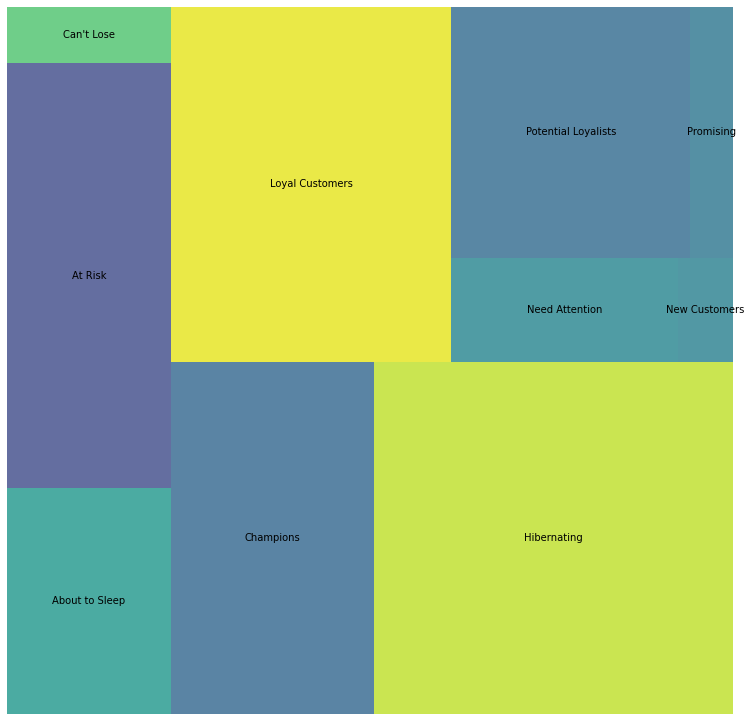

In [61]:
import squarify
fig, ax = plt.subplots(1, figsize = (13,13))

squarify.plot(sizes=df_treemap['customers'],label=df_treemap['Segment'], alpha=0.8)
plt.axis('off')
plt.show()